# Import Dataset

In [ ]:
import transformers
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/kaggle/input/steam-reviews/output.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [ ]:
dataset.dropna(subset=['content','is_positive'],inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200723 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           200723 non-null  int64 
 1   app_id       200723 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    200723 non-null  int64 
 4   is_positive  200723 non-null  object
dtypes: int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
import string
from nltk.corpus import stopwords,words
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))  # List of common stopwords
punctuation = string.punctuation  # List of punctuation
valid_words = set(words.words())  

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Text Data EDA

In [ ]:
import matplotlib.pyplot as plt
class EDA_text:

    def __init__(self, df):
        self.df_copy = df.copy()

    def count_words(self):
        try:
            word_count = []
            for index, row in self.df_copy.iterrows():
                if len(row['content']) == 0:
                    print(f"index: {index}, row: {row}")
                count = len(row['content'].split(" "))
                word_count.append(count)
            self.df_copy['word_count'] = word_count
        except Exception as e:
            print(f'error: {e}')

    def check_valid_token(self):
        try:
            processed_content = []
            stop_invalid_words = []

            for index, row in self.df_copy.iterrows():
                text = row['content']

                if not isinstance(text, str):
                    processed_content.append([])
                    stop_invalid_words.append([])
                    continue

                text_data = text.lower()

                text_data = ''.join([char for char in text_data if char not in punctuation])

                words = word_tokenize(text_data)

                valid_tokens = [word for word in words if word not in stop_words or word in valid_words]
                stop_invalid = [word for word in words if word in stop_words or word not in valid_words]

                processed_content.append(valid_tokens)
                stop_invalid_words.append(stop_invalid)

            self.df_copy['process_content'] = processed_content
            self.df_copy['stop_words'] = stop_invalid_words
            self.df_copy['tokens_count'] = self.df_copy['process_content'].apply(len)
            self.df_copy['stop_word_count'] = self.df_copy['stop_words'].apply(len)

        except Exception as e:
            print(f'error: {e}')

    def do_EDA(self):
        print("Starting EDA for the given text data")
        print("Started calculating content length per row")
        self.df_copy['content_length'] = self.df_copy['content'].apply(len)
        print("completed calculating content length")
        print("Starting word count per row")
        self.count_words()
        print("completed word count")
        print("Starting valid token checker")
        self.check_valid_token()
        print("completed valid token checker")
        print('displaying results')

        plt.figure(figsize=(10, 10))

        plt.subplot(2, 2, 1)
        plt.title("Content length")
        plt.hist(self.df_copy['content_length'], bins=100, rwidth=0.8, color='b', log=True)
        plt.xlabel('content length')
        plt.ylabel('no of rows')
        
        plt.subplot(2, 2, 2)
        plt.title("Word count")
        plt.hist(self.df_copy['word_count'], bins=100, rwidth=0.8, color='g', log=True)
        plt.xlabel('Word counts')
        plt.ylabel('No of rows')
        
        plt.subplot(2, 2, 3)
        plt.title("Possible valid tokens count")
        plt.hist(self.df_copy['tokens_count'], bins=100, rwidth=0.8, color='g', log=True)
        plt.xlabel('no of valid token')
        plt.ylabel('no of rows')

        plt.subplot(2, 2, 4)
        plt.title("Stop words and invalid count")
        plt.hist(self.df_copy['stop_word_count'], bins=100, rwidth=0.8, color='b', log=True)
        plt.xlabel('no of stop words and invalid words')
        plt.ylabel('no of rows')

        plt.tight_layout()
        plt.show()

        display(self.df_copy.describe())
        display(self.df_copy.info())

Starting EDA for the given text data
Started calculating content length per row
completed calculating content length
Starting word count per row
completed word count
Starting valid token checker
completed valid token checker
displaying results


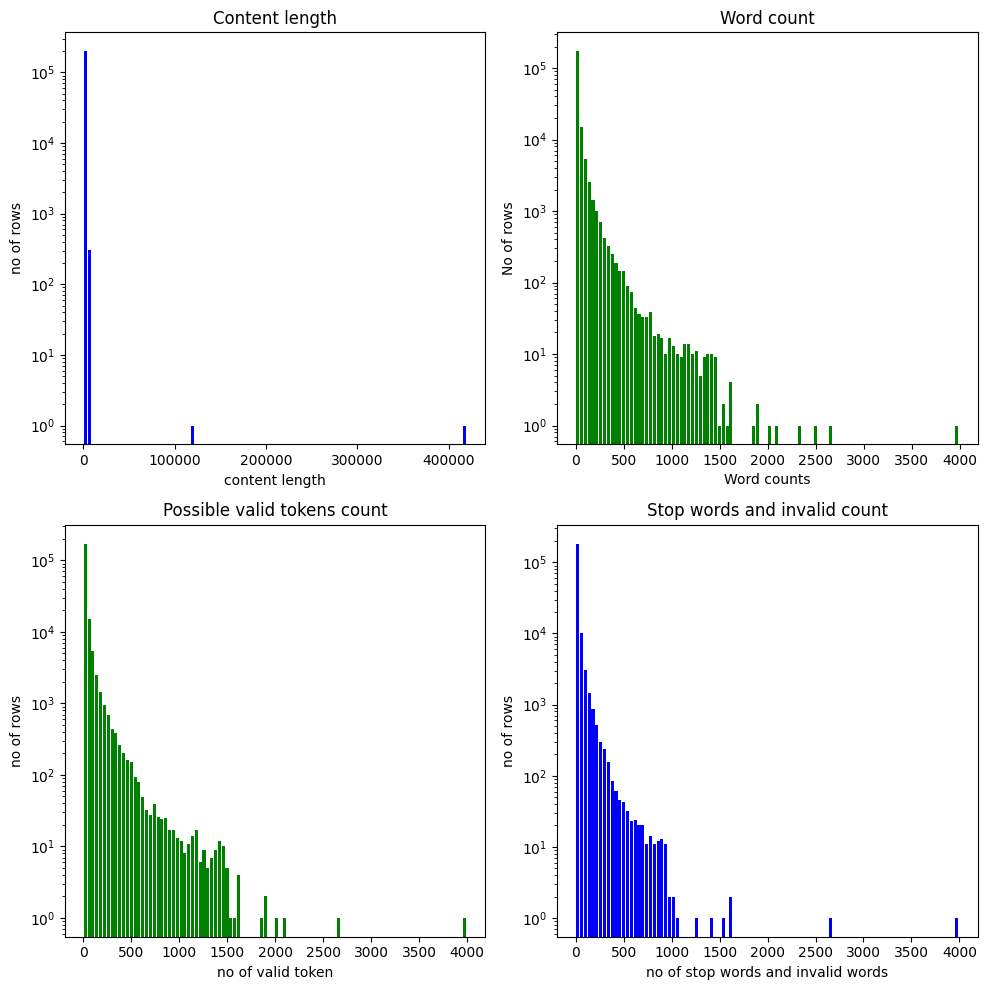

,id,app_id,author_id,content_length,word_count,tokens_count,stop_word_count
count,2.007230e+05,200723.000000,2.007230e+05,200723.000000,200723.000000,200723.000000,200723.000000
mean,1.224236e+08,452.955326,7.656120e+16,143.123035,24.924388,25.078506,15.140846
std,5.897882e+07,322.262057,5.422832e+08,1044.805167,65.925959,66.285660,41.922125
min,2.090000e+02,10.000000,7.656120e+16,1.000000,1.000000,0.000000,0.000000
25%,7.281209e+07,240.000000,7.656120e+16,15.000000,3.000000,3.000000,1.000000
50%,1.479517e+08,440.000000,7.656120e+16,41.000000,8.000000,8.000000,4.000000
75%,1.690358e+08,620.000000,7.656120e+16,115.000000,21.000000,21.000000,13.000000
max,1.822350e+08,1930.000000,7.656120e+16,419580.000000,3992.000000,3994.000000,3994.000000


<class 'pandas.core.frame.DataFrame'>
Index: 200723 entries, 0 to 201150
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               200723 non-null  int64 
 1   app_id           200723 non-null  int64 
 2   content          200723 non-null  object
 3   author_id        200723 non-null  int64 
 4   is_positive      200723 non-null  object
 5   content_length   200723 non-null  int64 
 6   word_count       200723 non-null  int64 
 7   process_content  200723 non-null  object
 8   stop_words       200723 non-null  object
 9   tokens_count     200723 non-null  int64 
 10  stop_word_count  200723 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 18.4+ MB


None

In [ ]:
EDA = EDA_text(dataset)
EDA.do_EDA()